# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


prev = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')
prev = prev.drop(columns=['Unnamed: 0', 'index', 'data_ref'])
prev.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [77]:
prev = prev.dropna(axis=0)
prev.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
mau                      0
renda                    0
dtype: int64

In [78]:
prev.drop_duplicates(inplace=True)
prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 14992
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   8704 non-null   object 
 1   posse_de_veiculo       8704 non-null   bool   
 2   posse_de_imovel        8704 non-null   bool   
 3   qtd_filhos             8704 non-null   int64  
 4   tipo_renda             8704 non-null   object 
 5   educacao               8704 non-null   object 
 6   estado_civil           8704 non-null   object 
 7   tipo_residencia        8704 non-null   object 
 8   idade                  8704 non-null   int64  
 9   tempo_emprego          8704 non-null   float64
 10  qt_pessoas_residencia  8704 non-null   float64
 11  mau                    8704 non-null   bool   
 12  renda                  8704 non-null   float64
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 773.5+ KB


In [79]:
prev.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.000923,0.085228,-0.101271,-0.090209,0.127793,-0.010103,0.033327
posse_de_imovel,-0.000923,1.000000,0.022690,0.080048,-0.000652,0.013866,-0.018441,0.028380
qtd_filhos,0.085228,0.022690,1.000000,-0.298469,-0.074262,0.906652,0.007846,-0.018920
idade,-0.101271,0.080048,-0.298469,1.000000,0.322823,-0.266595,-0.016748,0.151138
tempo_emprego,-0.090209,-0.000652,-0.074262,0.322823,1.000000,-0.065206,-0.045968,0.403591
qt_pessoas_residencia,0.127793,0.013866,0.906652,-0.266595,-0.065206,1.000000,0.000077,-0.009074
mau,-0.010103,-0.018441,0.007846,-0.016748,-0.045968,0.000077,1.000000,-0.011320
renda,0.033327,0.028380,-0.018920,0.151138,0.403591,-0.009074,-0.011320,1.000000


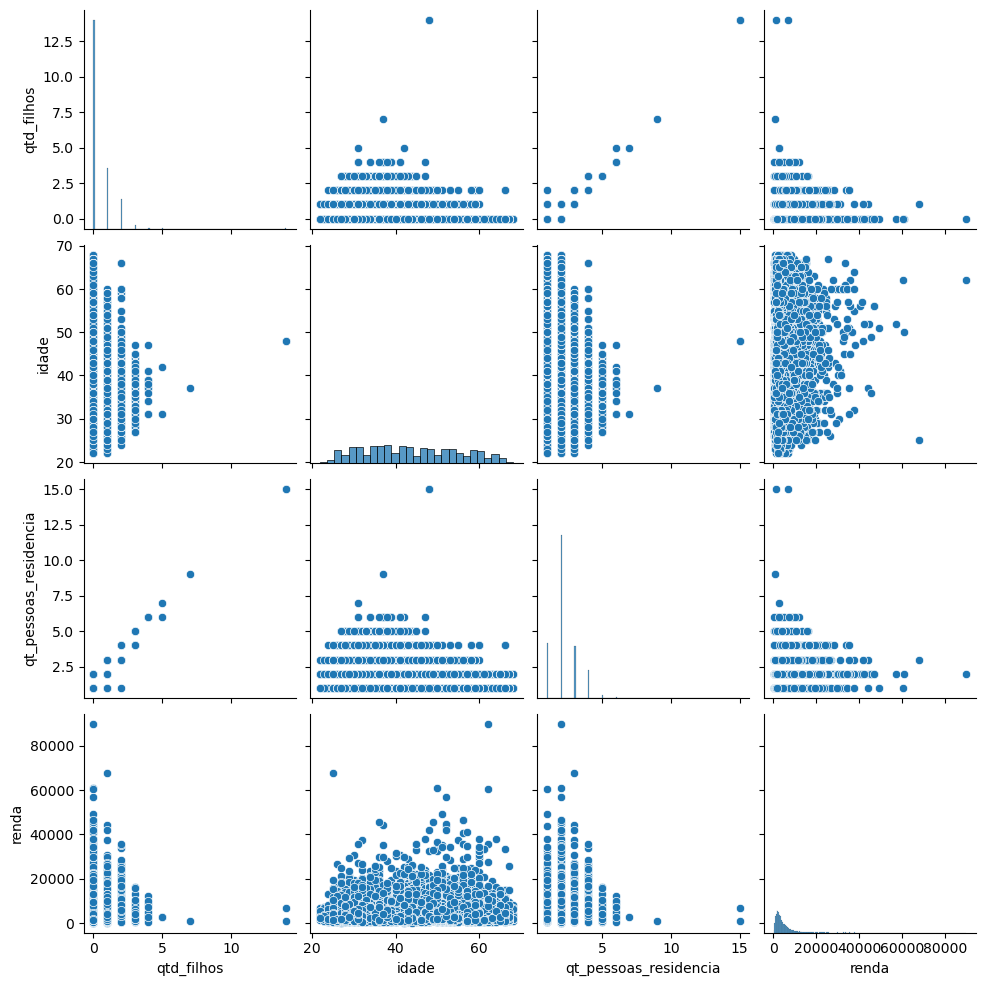

In [68]:
prev_i = prev[['qtd_filhos', 'idade', 'qt_pessoas_residencia', 'renda']]
sns.pairplot(data=prev_i)

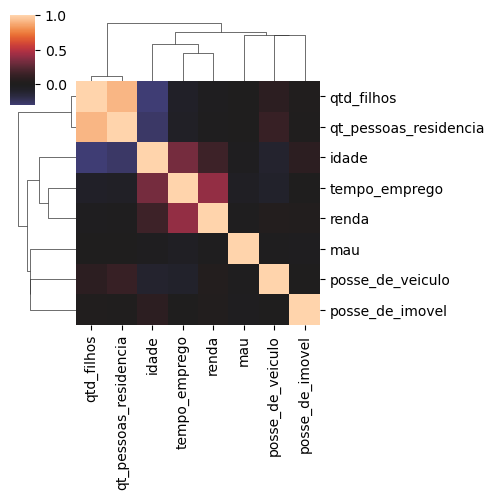

In [81]:
sns.clustermap((prev.corr()), figsize=(5, 5), center = 0)

In [ ]:
# Há uma notável correlação, entre as variáveis 'qtd_filhos' e 'qt_pessoas_residencia', e outra, inversamente proporcional,
# entre 'idade' e {'qtd_filhos', 'qt_pessoas_residencia'}

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='idade', ylabel='tempo_emprego'>

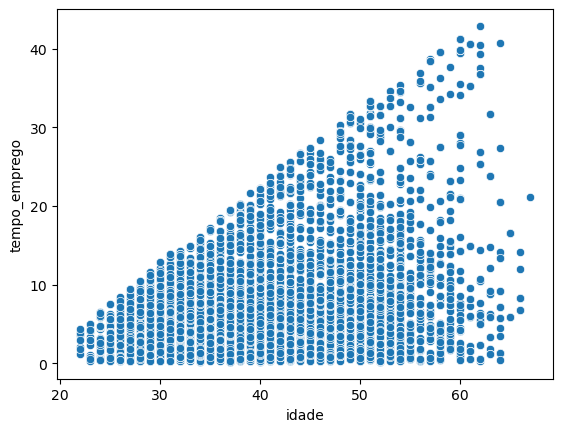

In [84]:
sns.scatterplot(data=prev, x='idade', y='tempo_emprego')

In [ ]:
# Pode=se notar que o gráfico mostra que quanto maior a idade, maior tende a ser o tempo de emprego.

3) Na su aopinião, há outliers na variável renda?

In [96]:
prev['renda'].max()

89918.04

<AxesSubplot:xlabel='renda', ylabel='idade'>

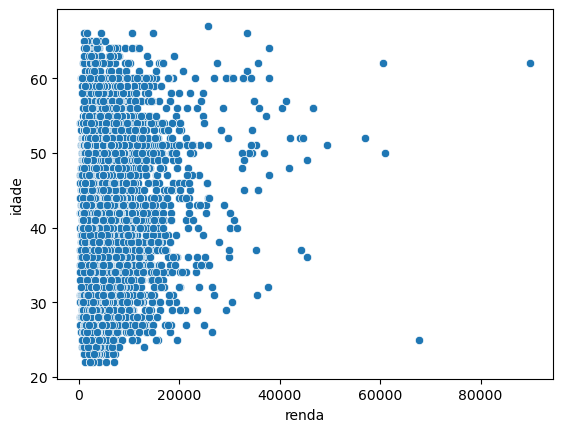

In [103]:
sns.scatterplot(data=prev, x='renda', y='idade')

<AxesSubplot:xlabel='renda', ylabel='tempo_emprego'>

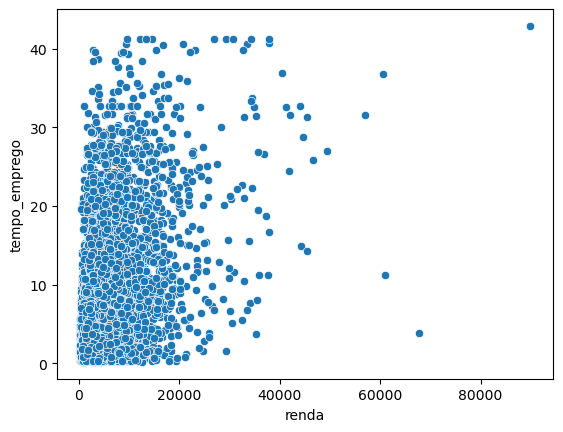

In [100]:
sns.scatterplot(data=prev, x='renda', y='tempo_emprego')

In [93]:
prev['renda'].mean()

4852.248809742633

In [ ]:
# Sim, existem alguns outliers com renda muito discrepante em relação à média avaliada. Inclusive extremamente jovens
# proporcionalmente à renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<AxesSubplot:xlabel='log_renda', ylabel='tempo_emprego'>

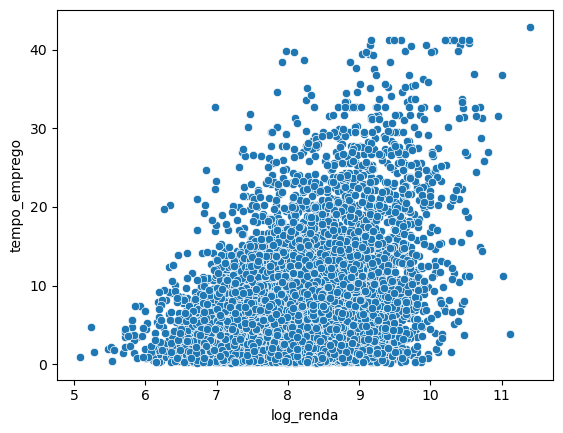

In [102]:
prev_log = prev.copy()
prev_log['log_renda'] = np.log(prev_log['renda'])
sns.scatterplot(data=prev_log, x='log_renda', y='tempo_emprego')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
# Melhorou, nota-se uma tendência de crescimento mais clara a partir da aplicação do LOG na análise.